# Map of Detroit Rivers

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# read the shp file of Detroit river
detroit_river = gpd.read_file("../data/maps/detroit_river_aoc_shapefile/AOC_MI_Detroit_2021.shp")

# check the attributes of the data
print(detroit_river.columns)
print(detroit_river)
print("The Coordinate Reference System (CRS) is:", detroit_river.crs)

In [ ]:
# visualize the detriot river
fig, ax = plt.subplots(dpi = 100)
detroit_river.plot(ax = ax)
ax.set_title("Detroit River Area of Concern")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

In [ ]:
# read the environmental data and visualize the sampling points
env_data = gpd.read_file("../data/environmental_data.csv")
env_data.head()

# create the Geometry column from the latitude and longitude
env_data['geometry'] = gpd.points_from_xy(env_data['Longitude'], env_data['Latitude'])
env_data = gpd.GeoDataFrame(env_data, geometry='geometry')
env_data.head()

In [ ]:
from scipy.stats import gaussian_kde
import numpy as np

# visualize the geometry of the environmental data in the same plot
fig, ax = plt.subplots(dpi = 300)
detroit_river.plot(ax = ax, color='lightblue', edgecolor='black')

# Extract coordinates of sampling points
coords = np.array([(geom.x, geom.y) for geom in env_data.geometry])

# Perform kernel density estimation
kde = gaussian_kde(coords.T)
xmin, ymin, xmax, ymax = detroit_river.total_bounds
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([xx.ravel(), yy.ravel()])
density = kde(positions).reshape(xx.shape)

# Plot density as a contourf
# ax.contourf(xx, yy, density, levels=20, cmap='hot', alpha=0.6)
env_data.plot(ax=ax, color='black', markersize=10)

ax.set_title("Detroit River Area of Concern with Environmental Sampling Points")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

# Complete the whole map of the corridor

In [ ]:
world_lakes = gpd.read_file("../data/maps/ne_10m_lakes/ne_10m_lakes.shp")
lake_stclair = world_lakes[world_lakes['name'] == 'Lake Saint Clair']
lake_erie = world_lakes[world_lakes['name'] == 'Lake Erie']
river_stclair = gpd.read_file("../data/maps/aoc_mi_stclair_2021/AOC_MI_StClair_2021.shp")
lake_huron = world_lakes[world_lakes['name'] == 'Lake Huron']

# save the lakes to a new shapefile
# lake_stclair.to_file("../data/maps/lake_stclair.shp")
# lake_erie.to_file("../data/maps/lake_erie.shp")
# lake_huron.to_file("../data/maps/lake_huron/lake_huron.shp")

In [ ]:
# a function to quickly plot the Detroit River with adjacent lakes
def plot_rivers_lakes(ax = None, annotating = False):
    """Plot the Detroit River with adjacent lakes."""
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
        
    # read the two shape files of the lakes
    lake_stclair = gpd.read_file("../data/maps/lake_stclair/lake_stclair.shp")
    lake_erie = gpd.read_file("../data/maps/lake_erie/lake_erie.shp")
    detroit_river = gpd.read_file("../data/maps/detroit_river_aoc_shapefile/AOC_MI_Detroit_2021.shp")
    stclair_river = gpd.read_file("../data/maps/aoc_mi_stclair_2021/AOC_MI_StClair_2021.shp")
    lake_huron = gpd.read_file("../data/maps/lake_huron/lake_huron.shp")
    
    # plot the Detroit River and the lakes
    lake_stclair.plot(ax=ax, color='lightblue', edgecolor='none', alpha=0.5)
    lake_erie.plot(ax=ax, color='lightblue', edgecolor='none', alpha=0.5)
    lake_huron.plot(ax=ax, color='lightblue', edgecolor='none', alpha=0.5)
    detroit_river.plot(ax=ax, color='lightblue', edgecolor='none')
    stclair_river.plot(ax=ax, color='lightblue', edgecolor='none')
    ax.set_title("The Huron-Erie Corridor")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    # ax.set_ylim(42, 43.2)  # Set y-limits to focus on North America
    # ax.set_xlim(-83.3, -82.3)  # Set x-limits to focus on North America
    
    # if annotating are True, annotate the rivers and lakes
    if annotating == True:
        # annotate the rivers and lakes 
        ax.annotate(
            'Detroit River',
            xy=(-83.1, 42.3),
            xytext=(-83.28, 42.4),
            arrowprops=dict(arrowstyle='->', linewidth=1, color='black'),
            fontsize=8,
            color='blue',
            weight='bold'
        )
        ax.text(-82.85, 42.42, 'Lake Saint Clair', fontsize=8, color = 'blue', weight='bold')
        ax.annotate(
            "Staint Clair River",
            xy=(-82.5, 42.8),
            xytext=(-82.95, 42.9),
            arrowprops=dict(arrowstyle='->', linewidth=1, color='black'),
            fontsize=8,
            color='blue',
            weight='bold'
        )
        ax.text(-82.55, 42.05, 'Lake Erie', fontsize=8, color = 'gray', style='italic') 
        ax.text(-82.65, 43.1, 'Lake Huron', fontsize=8, color = 'gray', style='italic')
    return fig, ax

In [ ]:
from matplotlib.patches import Circle

# test the function
fig, axes = plt.subplots(1, 2, figsize=(11, 6), dpi=300)
# flatten the axes for easy indexing
axes = axes.flatten()

# enrich the great lakes map
fig, ax1 = plot_rivers_lakes(ax = axes[0], annotating = False)

# Define the center and radius of the circle (approximate for the corridor)
lake_st_clair_center = (-82.8, 42.55)
radius = 0.55  # degrees, adjust as needed for visual fit
circle = Circle(lake_st_clair_center, radius, 
                edgecolor='blue', facecolor='none', linewidth=2, linestyle='--',
                zorder=10)
ax1.add_patch(circle)
ax1.annotate("Huron-Erie Corridor", xy=(-83, 43), xytext=(-84.6, 43.5),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=8, color='blue', weight='bold')

# annotate the two greak lakes
ax1.text(-82, 42, 'Lake Erie', fontsize=12, color = 'gray', style='italic')
ax1.text(-83.2, 45, 'Lake Huron', fontsize=12, color = 'gray', style='italic')
ax1.set_title("The Great Lake Huron and Lake Erie")
ax1.grid(True, linestyle='--', alpha=0.5)

# enrich the Huron-Erie corridor map
fig, ax2 = plot_rivers_lakes(ax = axes[1], annotating = True)
env_data.plot(ax=ax2, color='green', markersize=7, label = "Part of Sampleing Points")
ax2.set_ylim(42, 43.2)  # Set y-limits to focus on North America
ax2.set_xlim(-83.3, -82.3)  # Set x-limits to focus on North America
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig("../results/map_of_huron_erie_corridor.png", dpi=300)

# US national park wild-fire research

In [220]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt

In [221]:
# the satellite wild fire data
data = pd.read_csv("/Users/gufeng/2025_winter/Thesis_Project/papers/to_read_and_implement/untitled folder/SpectralIndices_RobertFire_GlacierNP (1).csv")
# the us states shape file
us_states = gpd.read_file("/Users/gufeng/2025_winter/Thesis_Project/papers/to_read_and_implement/untitled folder/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
# the us conties shape file
us_counties = gpd.read_file("/Users/gufeng/2025_winter/Thesis_Project/papers/to_read_and_implement/untitled folder/ne_10m_admin_2_counties/ne_10m_admin_2_counties.shp")
# us national park shape file
us_parks = gpd.read_file("/Users/gufeng/2025_winter/Thesis_Project/papers/to_read_and_implement/untitled folder/ne_10m_parks_and_protected_lands/ne_10m_parks_and_protected_lands_area.shp")

In [252]:
# Create geometry column from latitude and longitude
data['geometry'] = gpd.points_from_xy(data['lon'], data['lat'])

# Convert to GeoDataFrame
data_gdf = gpd.GeoDataFrame(data, geometry='geometry')

## Find subject from these collection of shapes

Take out the Glacier National Park boundary, where the wild fires were researched.

In [235]:
# Filter for Glacier National Park, where the fires were researched
glacier_np = us_parks[us_parks['name'] == 'Glacier']
print("Glacier National Park found:")
glacier_np

Glacier National Park found:


,unit_code,unit_name,unit_type,nps_region,scalerank,featurecla,note,name,geometry
60,GLAC,Glacier NP,National Park,Intermountain,3,National Park Service,None,Glacier,"POLYGON ((-114.01978 48.51379, -114.01978 48.5..."


Take out the Montana state boundary to clearly distinguish the national park.

<Axes: >

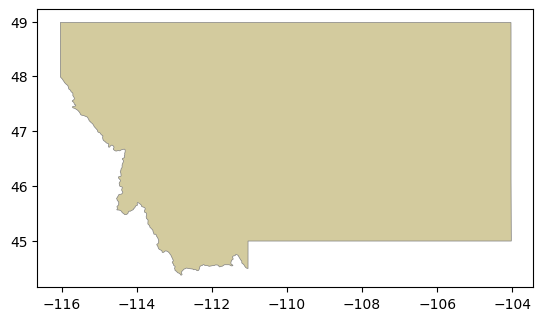

In [ ]:
# Filter the Montana state region
montana = us_states[(us_states['name'] == 'Montana') & (us_states['iso_a2'] == 'US')]
montana.boundary.plot(facecolor="#d3cb9e", edgecolor="0.5", linewidth=0.5)

## Water sources around the national park 

Read the Montana water source shape files and extract relevant water bodies in the park.

McDonald Lake found:
          gnis_name        Acres                  HUC8
2654  LAKE MCDONALD  6909.726977  Middle Fork Flathead


/var/folders/s5/r1s56_ps46lbbv1370hjn_vr0000gn/T/ipykernel_80014/962586403.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
/var/folders/s5/r1s56_ps46lbbv1370hjn_vr0000gn/T/ipykernel_80014/962586403.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


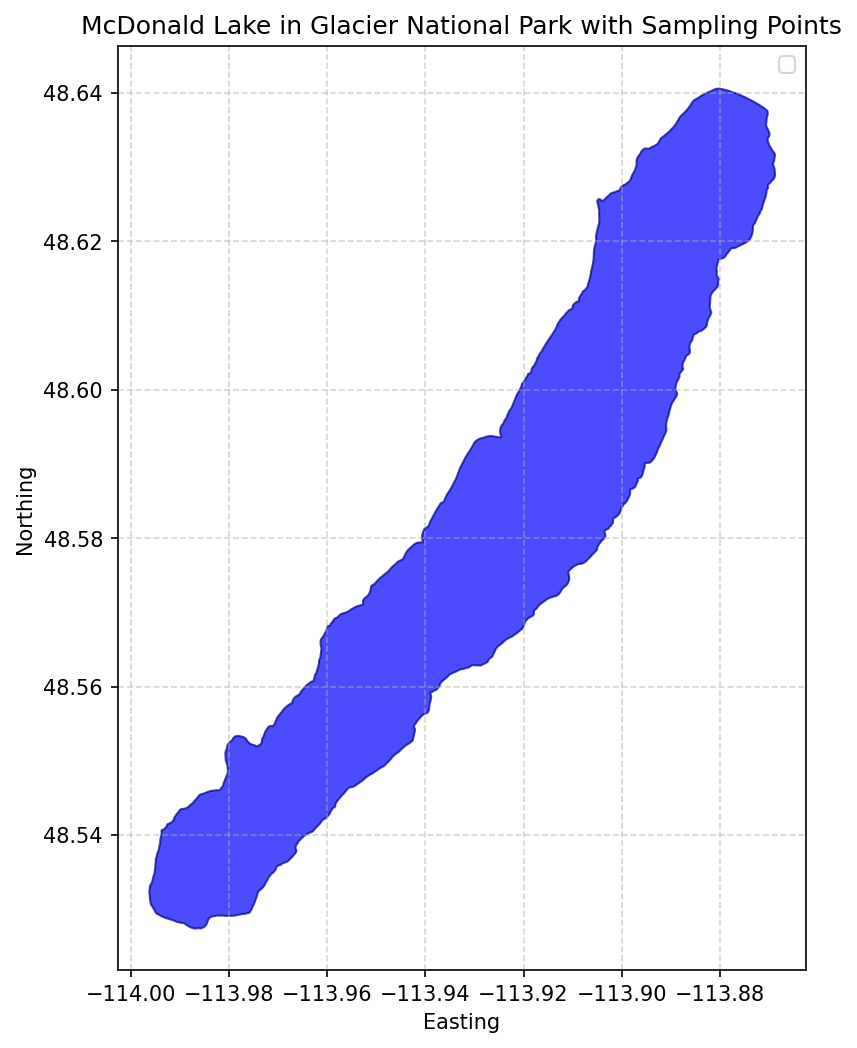

In [236]:
# find the montana lakes
montana_lakes = gpd.read_file("/Users/gufeng/2025_winter/Thesis_Project/papers/to_read_and_implement/untitled folder/Montana_NamedStreamsandLakes_SHP/Lakes24K_NamedOnly.shp")
# Filter for McDonald Lake
glacier_national_park_lake = montana_lakes[montana_lakes['gnis_name'].str.contains('LAKE MCDONALD', case=False, na=False)]
print("McDonald Lake found:")
print(glacier_national_park_lake[['gnis_name', 'Acres', 'HUC8']])
# Transform the geometry to WGS84 (lat/lon) for better readability
glacier_national_park_lake_wgs84 = glacier_national_park_lake.to_crs('EPSG:4326')

# visualize McDonald Lake
fig, ax = plt.subplots(figsize=(10, 8), dpi=150)

# Plot Glacier National Park boundary
# glacier_np.boundary.plot(ax=ax, color='green', linewidth=2, label='Glacier National Park')

# Plot McDonald Lak
glacier_national_park_lake_wgs84.plot(ax=ax, color='blue', alpha=0.7, edgecolor='darkblue', linewidth=1, label='McDonald Lake')

ax.set_title("McDonald Lake in Glacier National Park with Sampling Points")
ax.set_xlabel("Easting")
ax.set_ylabel("Northing") 
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Find all water sources around the national park from the water souce data frame

In [241]:
# Transform montana_lakes to WGS84 (lat/lon) coordinate system
montana_lakes_wgs84 = montana_lakes.to_crs('EPSG:4326')
print("Montana lakes transformed to WGS84:")
print("CRS:", montana_lakes_wgs84.crs)
montana_lakes_wgs84.head()

Montana lakes transformed to WGS84:
CRS: EPSG:4326


,gnis_id,gnis_name,SHAPE_Leng,SHAPE_Area,Acres,HUC8,geometry
0,00785040,HORSE CREEK BASIN RESERVOIR,152.310580,1.128082e+03,0.278848,Lower Tongue,"POLYGON Z ((-106.27948 45.30009 0, -106.27956 ..."
1,00792117,THREE BEARS LAKE,1263.366129,4.584118e+04,11.335400,Two Medicine,"POLYGON Z ((-113.36049 48.32566 0, -113.36056 ..."
2,00778757,ZEMPEL LAKE,12227.326492,2.521138e+05,62.369811,Big Porcupine,"POLYGON Z ((-107.01401 46.50965 0, -107.01389 ..."
3,00805549,LAKE MASON,11211.206684,3.060241e+06,757.067371,Middle Musselshell,"POLYGON Z ((-108.65785 46.54174 0, -108.65729 ..."
4,00799100,SYME SLOUGH,2318.473127,3.708907e+05,91.659238,Big Muddy,"POLYGON Z ((-104.59885 48.91131 0, -104.59877 ..."


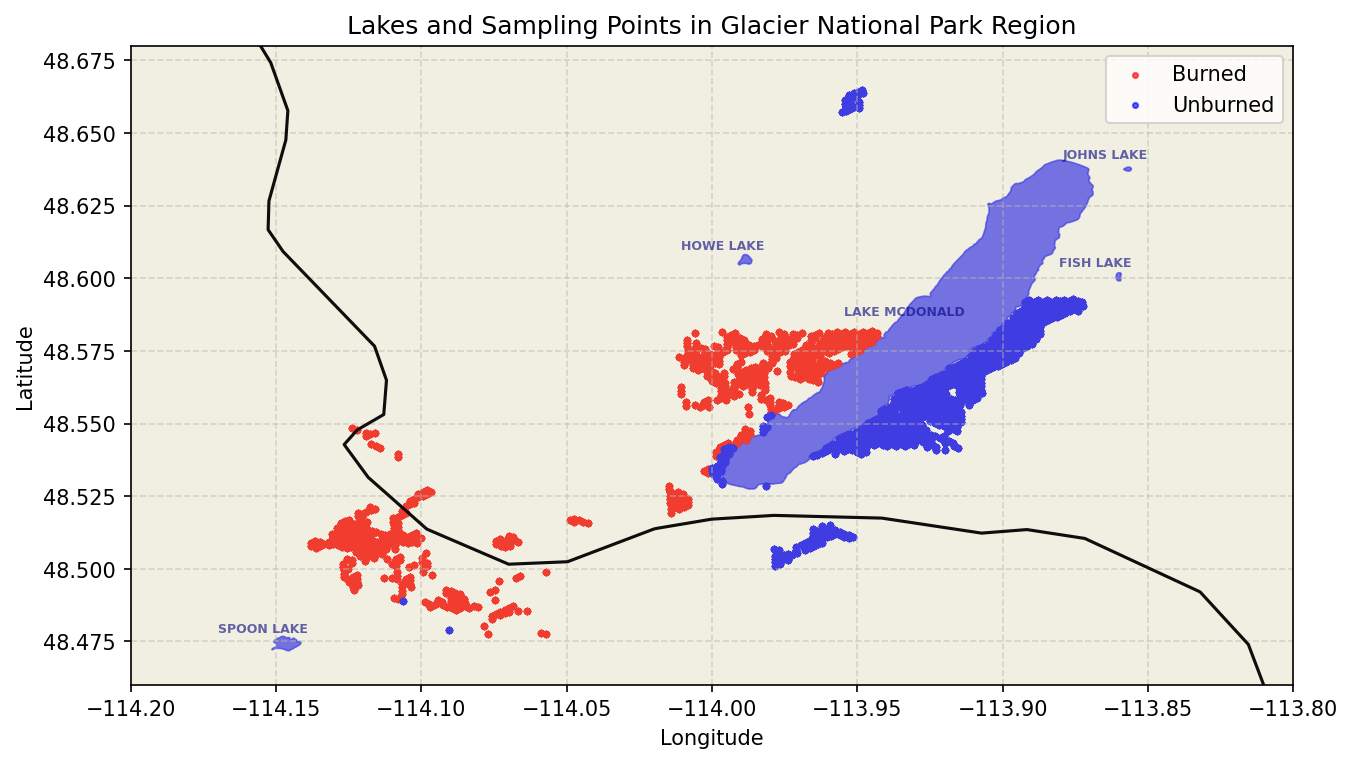

Found 5 lakes in the region:
          gnis_name        Acres                  HUC8
112       FISH LAKE     7.760802  Middle Fork Flathead
1088     SPOON LAKE    59.824038         Flathead Lake
2654  LAKE MCDONALD  6909.726977  Middle Fork Flathead
3140     JOHNS LAKE     5.092431  Middle Fork Flathead
3527      HOWE LAKE    20.476020  Middle Fork Flathead


In [256]:
# Filter montana_lakes within the specified bounds
lakes_in_roi = montana_lakes_wgs84.cx[-114.2:-113.85, 48.475:48.65]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=150)

# Plot existing map layers
montana.boundary.plot(ax=ax, facecolor="#d3cb9e", edgecolor="black", linewidth=1, alpha=0.3)
glacier_np.boundary.plot(ax=ax, color="#0f0e0e", edgecolor="black")

# Plot all lakes in the region
lakes_in_roi.plot(ax=ax, color='blue', edgecolor='blue', alpha=0.7, linewidth=0.8)

# Add labels for the lakes
for idx, lake in lakes_in_roi.iterrows():
    # Get the centroid of each lake for label placement
    centroid = lake.geometry.centroid
    # Add text annotation with lake name
    ax.text(centroid.x-0.008, centroid.y+0.005, lake['gnis_name'], 
            fontsize=6, ha='center', va='center', 
            color='navy', weight='bold', alpha = 0.6)

# Create separate datasets for burned and unburned points
burned_points = data_gdf[data_gdf['burnYN'] == 1]
unburned_points = data_gdf[data_gdf['burnYN'] == 0]

# Plot burned and unburned points with different colors
burned_points.plot(ax=ax, color='red', markersize=6, alpha=0.6, label='Burned')
unburned_points.plot(ax=ax, color='blue', markersize=6, alpha=0.6, label='Unburned')


ax.set_title("Lakes and Sampling Points in Glacier National Park Region")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# set the x and y limits to the bounds of these points
ax.set_xlim([-114.2, -113.8])
ax.set_ylim([48.46, 48.68])
plt.show()

# Print information about the lakes found
print(f"Found {len(lakes_in_roi)} lakes in the region:")
print(lakes_in_roi[['gnis_name', 'Acres', 'HUC8']])